# Statistiques sur les artistes

## Paquets utilisés

In [125]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Regroupement des sons par artistes

In [126]:
songs = pd.read_json("./datas/songs.json")

songs

songs["lyrics_list"] = songs["lyrics"].apply(lambda x: x.split(" "))

artist_as_dataframe = songs['artist'].apply(pd.Series)
artist_as_dataframe.rename(columns=lambda x: "artist_" + str(x), inplace=True)

album_as_dataframe = songs['album'].apply(pd.Series)
album_as_dataframe.rename(columns=lambda x: "album_" + str(x), inplace=True)

songs = pd.concat([
    artist_as_dataframe,
    album_as_dataframe,
    songs
], axis=1)

songs["artist_dict"] = songs["artist"].apply(lambda x: json.dumps(x))

songs

,artist_name,artist_id,artist_url,artist_image,album_name,album_id,id,name,album,artist,image,url,original_lyrics,date,query,lyrics,lyrics_keywords,lyrics_list,artist_dict
0,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408722,F*cked Up 4,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/5d1737204d5b010efc28...,https://genius.com/Josman-fcked-up-4-lyrics,"[Paroles de ""F*cked Up 4""] [Intro] J.O.S J.O.S...",2021-01-28T00:00:00,josman - f*cked up 4,j o s j o s j o s j o s j o s j o s j o s j o ...,monnaie sur té-c té-c bois le jack sec sec rou...,"[j, o, s, j, o, s, j, o, s, j, o, s, j, o, s, ...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
1,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408724,Doré,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-dore-lyrics,"[Paroles de ""Doré""] [Refrain] Le ciel est doré...",2021-01-29T00:00:00,josman - doré,le ciel est doré j'allume mon doré j'sais pas ...,le ciel est doré allume mon doré sais pas sur ...,"[le, ciel, est, doré, j'allume, mon, doré, j's...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
2,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408725,Décisions,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-decisions-lyrics,"[Paroles de ""Décisions""] [Couplet 1] J'peux pa...",2021-01-29T00:00:00,josman - décisions,j'peux pas m'afficher j'peux pas paraître ridi...,peux pas afficher peux pas paraître ridicule r...,"[j'peux, pas, m'afficher, j'peux, pas, paraîtr...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
3,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408726,SEC,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-sec-lyrics,"[Paroles de ""SEC""] [Intro] Sec comme le miel, ...",2021-01-29T00:00:00,josman - sec,sec comme le miel yah tu m'verras pas ému même...,sec comme le miel yah tu verras pas ému même s...,"[sec, comme, le, miel, yah, tu, m'verras, pas,...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
4,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408727,New Hares (Same Sh!t),"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-new-hares-same-sh-t-...,"[Paroles de ""New Hares (Same Sh!t)""] [Couplet ...",2021-01-29T00:00:00,josman - new hares (same sh!t),vrai négro gros nez épaté j'lâche des phases i...,vrai négro gros nez épaté lâche des phases ils...,"[vrai, négro, gros, nez, épaté, j'lâche, des, ...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Di-Meh,60891,https://genius.com/artists/Di-meh,https://images.genius.com/c618e1678656012159ad...,Mektoub,760403.0,6708599,Follow,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-follow-lyrics,"[Paroles de ""Follow""] [Refrain] Ouais j'y vais...",2021-05-14T00:00:00,di-meh - follow,ouais j'y vais solo qui m'aime me follow qui m...,ouais vais solo qui aime me follow qui aime me...,"[ouais, j'y, vais, solo, qui, m'aime, me, foll...","{""name"": ""Di-Meh"", ""id"": 60891, ""

In [127]:
artists_songs = pd.DataFrame(songs.groupby("artist_dict").apply(lambda g: g.to_dict("records"))).reset_index()

artists_songs.columns = ["artist", "songs"]

artists_songs["artist"] = artists_songs["artist"].apply(lambda x: json.loads(x))

artists = pd.DataFrame.from_dict(artists_songs["artist"].to_dict(), orient="index")

artists["songs"] = artists_songs["songs"]
artists["songs_count"] = artists_songs["songs"].map(lambda x: len(x))

artists = artists.sort_values("songs_count", ascending=False)

artists

,name,id,url,image,songs,songs_count
42,PNL,335710,https://genius.com/artists/Pnl,https://images.genius.com/1518f8e82d8a48060c5e...,"[{'artist_name': 'PNL', 'artist_id': 335710, '...",58
46,SCH,276476,https://genius.com/artists/Sch,https://images.genius.com/dfa1dc4028ae9d7567cd...,"[{'artist_name': 'SCH', 'artist_id': 276476, '...",54
37,Nekfeu,13063,https://genius.com/artists/Nekfeu,https://images.genius.com/5f89988a816404d2f29a...,"[{'artist_name': 'Nekfeu', 'artist_id': 13063,...",52
9,Damso,45855,https://genius.com/artists/Damso,https://images.genius.com/57aa49f445bb856c82f4...,"[{'artist_name': 'Damso', 'artist_id': 45855, ...",51
40,OrelSan,1286,https://genius.com/artists/Orelsan,https://images.genius.com/e31f6adc3dec9edafab8...,"[{'artist_name': 'OrelSan', 'artist_id': 1286,...",49
22,JuL,74283,https://genius.com/artists/Jul,https://images.genius.com/3d6d65909c61ae6035e8...,"[{'artist_name': 'JuL', 'artist_id': 74283, 'a...",41
31,Lomepal,16138,https://genius.com/artists/Lomepal,https://images.genius.com/cf19fa33f7a1cd3b1dd9...,"[{'artist_name': 'Lomepal', 'artist_id': 16138...",40
5,Booba,1282,https://genius.com/artists/Booba,https://images.genius.com/f87d62132f88bf91eee1...,"[{'artist_name': 'Booba', 'artist_id': 1282, '...",39
19,Hatik,147321,https://genius.com/artists/Hatik,https://images.genius.com/4d36213b4fdb8ef9a77b...,"[{'artist_name': 'Hatik', 'artist_id': 147321,...",38
18,Hamza,74111,https://genius.com/artists/Hamza,https://images.genius.com/4e999f4c4332ed7339dc...,"[{'artist_name': 'Hamza', 'artist_id': 74111, ...",36


<AxesSubplot:xlabel='artist_name'>

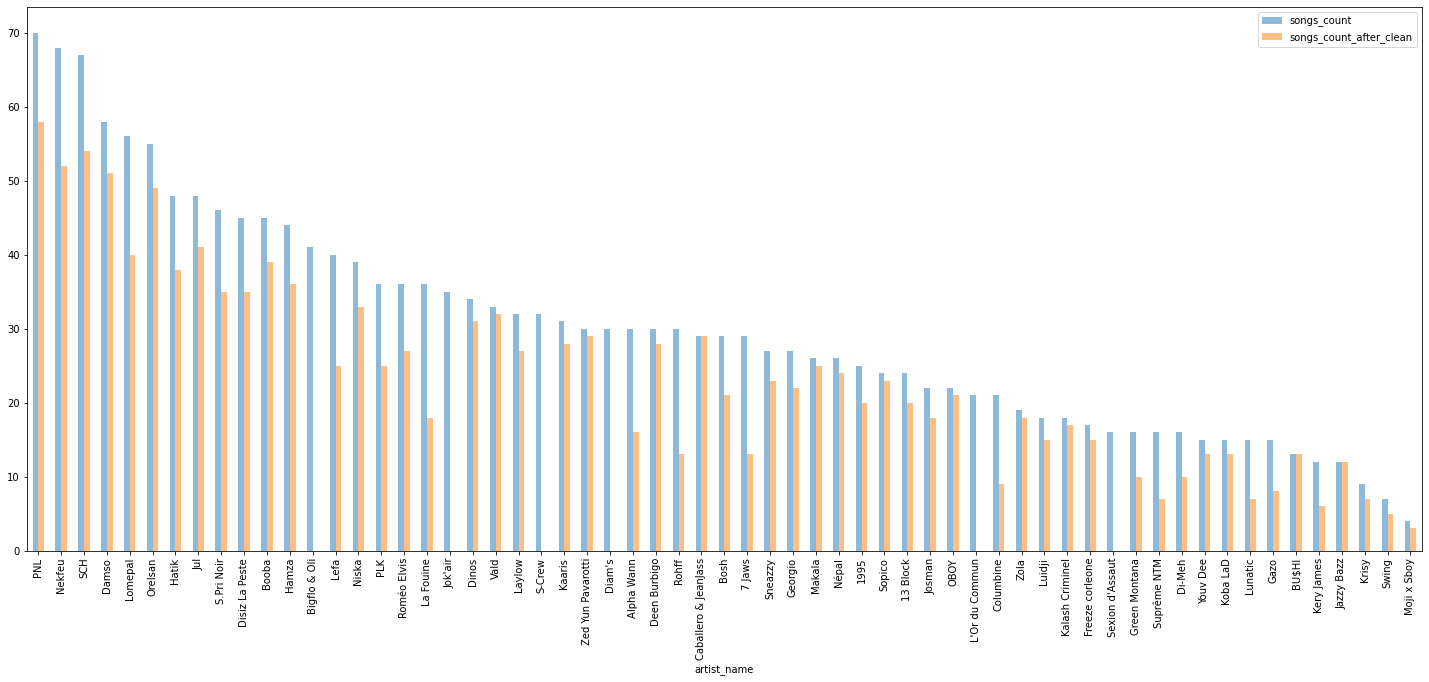

In [128]:
songs_inputs: pd.Series

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    songs_inputs = pd.Series(file.read().splitlines())
    file.close()

songs = songs_inputs.str.split(" - ", expand=True, n=1)
songs.columns = ["artist", "song"]

# Group the songs by artists
artists_songs = songs.groupby("artist")["song"].apply(list).reset_index(name="songs")
artists_songs["songs_count"] = artists_songs["songs"].apply(lambda x: len(x))
artists_songs.sort_values(by="songs_count", inplace=True, ascending=False)
artists_songs["artist_name"] = artists_songs["artist"]
artists_songs["artist"] = artists_songs["artist"].str.lower()
artists_songs.set_index("artist", inplace=True)
del artists_songs["songs"]


artists_comparaison = artists[["name", "songs_count"]].copy()
artists_comparaison.columns = ["artist", "songs_count_after_clean"]
artists_comparaison["artist"] = artists_comparaison["artist"].str.lower()
artists_comparaison.set_index("artist", inplace=True)

artists_songs = artists_songs.join(artists_comparaison)

artists_songs.plot.bar(alpha=0.5, x="artist_name", figsize=(25, 10))

## Calcul du pourcentage de répétition

In [129]:
def select_words(song: dict):
    songs_count = len(song)

    song_df = pd.DataFrame(song)
    words = song_df["lyrics"].map(lambda x: x.split(" ")).explode().to_list()

    return words

def select_unique_words(words: list):
    return pd.Series(words).drop_duplicates().to_list()

artists["words"] = artists_songs["songs"].map(select_words)
artists["words_count"] = artists["words"].map(lambda x: len(x))

artists["unique_words"] = artists["words"].map(select_unique_words)
artists["unique_words_count"] = artists["unique_words"].map(lambda x: len(x))

artists["reptition_count"] = artists["words_count"] - artists["unique_words_count"]

artists["repetition_percentage"] = artists["reptition_count"] / artists["words_count"] * 100

artists.sort_values(by="repetition_percentage", inplace=True)

artists

KeyError: 'songs'

## Classement des artistes se répétant le moins au plus

<AxesSubplot:xlabel='name'>

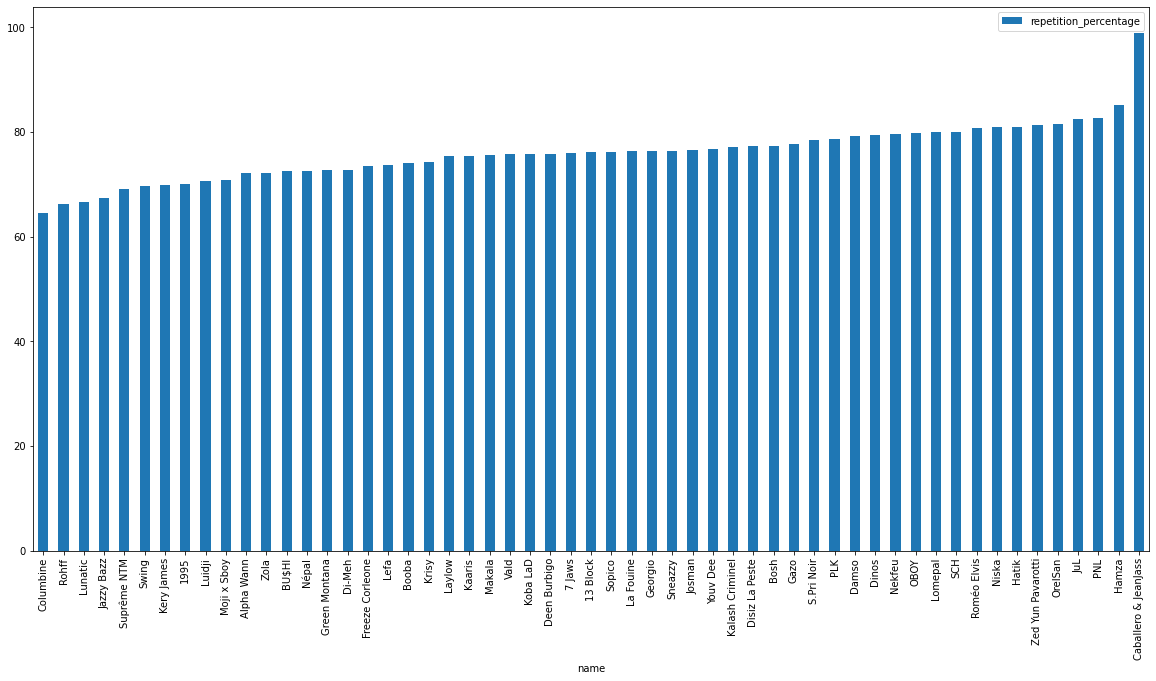

In [28]:
artists.plot(kind="bar", x="name", y="repetition_percentage", figsize=(20, 10))